<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Top-Model-Regression-Modeling/blob/main/RegressionModeling_GraphConvolutionalNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Convolutional Network based Regression Modeling




## Data loading and Preprocessing



In [ ]:
!pip install  deepchem
import deepchem
deepchem.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 11.0 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.8.0'

In [ ]:
!pip install rdkit

In [ ]:
# For Reporducibility
import numpy as np
np.random.seed(42)


In [ ]:
import deepchem as dc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import deepchem as dc
from deepchem.models.torch_models import GATModel
from deepchem.models.torch_models import MPNNModel
from deepchem.models import GraphConvModel
from deepchem.models import WeaveModel


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/Part_2_standarizationOfMolecule/StandarizedSmiles_cutOFF800daltonMolecularweight.xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
df['pIC50']=np.log10(df['IC50'])


In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_humanIndependent_tpot_final.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_eel_tpot_final.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_mouse_tpot_final.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_cow_tpot_final.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_ray_tpot_final.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_mosquito_tpot_final.xlsx')

In [ ]:
df_humanIndependent

,cleanedMol,IC50
0,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1,161.0
1,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...,7.3
2,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...,29.0
3,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...,38.0
4,C[n+]1c2c(c(N)c3ccccc31)CCCC2,12000.0
...,...,...
203,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...,2300.0
204,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...,4500.0
205,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...,7.0
206,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...,480.0


In [ ]:
df_humanIndependent['pIC50']=np.log10(df_humanIndependent['IC50'])
df_eel['pIC50']=np.log10(df_eel['IC50'])
df_mouse['pIC50']=np.log10(df_mouse['IC50'])
df_cow['pIC50']=np.log10(df_cow['IC50'])
df_ray['pIC50']=np.log10(df_ray['IC50'])
df_mosquito['pIC50']=np.log10(df_mosquito['IC50'])

## Graph Convolutional Network

In [ ]:
import deepchem as dc
import pandas as pd
from rdkit import Chem
from deepchem.feat import ConvMolFeaturizer

# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df['cleanedMol'].tolist())  # Featurize the molecules in the 'cleanedMol' column

# Extract the target values from the DataFrame
targets = df['pIC50'].tolist()  # Extract the target values from the 'classLabel' column

# Create a DeepChem dataset from the features and targets
dataset = dc.data.NumpyDataset(features, targets)  # Create a DeepChem dataset using the features and targets


In [ ]:
# Split your data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.X, dataset.y, test_size=0.20, random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [ ]:
train_dataset = dc.data.NumpyDataset(X_train, y_train)
valid_dataset = dc.data.NumpyDataset(X_valid, y_valid)
test_dataset = dc.data.NumpyDataset(X_test, y_test)


## Classification Modelling - Graph Convolutional Modelling

In [ ]:
import deepchem as dc
import joblib
from deepchem.models import GraphConvModel

# Define a function to create and train the GraphConvModel for regression
def create_and_train_graph_conv_model(train_dataset, n_tasks, batch_size, dropout, nb_epoch):
    model = GraphConvModel(n_tasks, batch_size=batch_size, dropout=dropout, mode='regression')
    model.fit(train_dataset, nb_epoch=nb_epoch)
    return model

# Define your hyperparameter search space
params = {
    'batch_size': [64, 128, 256],
    'dropout': [0.01, 0.1, 0.2],
    'nb_epoch': [10, 30, 60, 120]
}

# Define the evaluation metric for regression (RMSE)
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

# Define your model_builder function for regression
def model_builder(**model_params):
    batch_size = model_params['batch_size']
    dropout = model_params['dropout']
    nb_epoch = model_params['nb_epoch']

    return create_and_train_graph_conv_model(train_dataset, n_tasks=1, batch_size=batch_size, dropout=dropout, nb_epoch=nb_epoch)

# Create an optimizer and perform hyperparameter search
optimizer = dc.hyper.GridHyperparamOpt(model_builder)
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(params, train_dataset, test_dataset, metric)

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparams)


Best Hyperparameters: {'batch_size': 256, 'dropout': 0.2, 'nb_epoch': 10}


In [ ]:
best_hyperparams

{'batch_size': 256, 'dropout': 0.2, 'nb_epoch': 10}

In [ ]:
all_results

{'_batch_size_64_dropout_0.010000_nb_epoch_10': 0.9318124408346264,
 '_batch_size_64_dropout_0.010000_nb_epoch_30': 0.8808057270335379,
 '_batch_size_64_dropout_0.010000_nb_epoch_60': 0.7675283145803123,
 '_batch_size_64_dropout_0.010000_nb_epoch_120': 0.7776434697017954,
 '_batch_size_64_dropout_0.100000_nb_epoch_10': 1.1899343277656544,
 '_batch_size_64_dropout_0.100000_nb_epoch_30': 0.8742099200016249,
 '_batch_size_64_dropout_0.100000_nb_epoch_60': 0.9069357184536676,
 '_batch_size_64_dropout_0.100000_nb_epoch_120': 0.8529726735965835,
 '_batch_size_64_dropout_0.200000_nb_epoch_10': 2.022027542229409,
 '_batch_size_64_dropout_0.200000_nb_epoch_30': 1.1934271838387107,
 '_batch_size_64_dropout_0.200000_nb_epoch_60': 1.231321968710913,
 '_batch_size_64_dropout_0.200000_nb_epoch_120': 1.1565434017967477,
 '_batch_size_128_dropout_0.010000_nb_epoch_10': 1.0898175814495235,
 '_batch_size_128_dropout_0.010000_nb_epoch_30': 0.8455967725728001,
 '_batch_size_128_dropout_0.010000_nb_epoch_6

### Model Building with best Hyperparameters

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

import torch

torch.cuda.empty_cache()

In [ ]:
from deepchem.models import GraphConvModel
import joblib

# Train
n_tasks = 1
modela = GraphConvModel(n_tasks, batch_size=64, mode="regression", dropout=0.01, model_dir="/content/drive/MyDrive/Regression model /graphConv_reg")
modela.fit(train_dataset, nb_epoch=120)



0.21031501293182372

### Cross Species Evaluation-Graph Convolutional

### Featurization

In [ ]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

#### Human

In [ ]:

# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_humanIndependent['cleanedMol'].tolist())

# Step 3: Create DeepChem Datasets

# Extract the target values from the DataFrame
targets = df_humanIndependent['pIC50'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_humanIndependent= dc.data.NumpyDataset(features, targets)

#### Eel

In [ ]:
df_eel

,cleanedMol,IC50,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,CCOP(=S)(OCC)SCc1ccncc1,23950.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4.379306
1,O=C(COc1cc(=O)oc2ccccc12)N1CCC(Cc2ccccc2)CC1,3400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,4,0,3.531479
2,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,219.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,6,0,2.341830
3,Nc1c2c(nc3ccccc13)CCCC2,371.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,4,0,2.569959
4,O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccc(F)cc1F,601.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,2.778874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,COc1cccc2cc(C(=O)NCCc3c[nH]c4ccccc34)c(=O)oc12,2800.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,3.447158
6206,COc1ccc2cc(C(=O)NCCc3c[nH]c4ccccc34)c(=O)oc2c1,3500.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,3.544068
6207,COc1ccc(C(=O)N2CCC3(Cc4ccccc4C)c4ccccc4N(Cc4cc...,63.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.800786
6208,Cc1cccc(CN2c3ccccc3C3(Cc4cccc(C)c4)CCN(C(=O)c4...,21.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.328583


In [ ]:

# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_eel['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df_eel['pIC50'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_eel= dc.data.NumpyDataset(features, targets)

#### Cow

In [ ]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_cow['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df_cow['pIC50'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_cow= dc.data.NumpyDataset(features, targets)

#### Mosquito

In [ ]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_mosquito['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df_mosquito['pIC50'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_mosquito= dc.data.NumpyDataset(features, targets)

#### Ray

In [ ]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_ray['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_ray['pIC50'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_ray= dc.data.NumpyDataset(features, targets)

#### Mouse

In [ ]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_mouse['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df_mouse['pIC50'].tolist()
# Create a DeepChem dataset from the features and targets
dataset_mouse= dc.data.NumpyDataset(features, targets)

#### Cross species Evaluation_ Graph Conv

Evaluation for Human Test dataset:
R2 Score: 0.6845
Mean Squared Error: 0.7765
Mean Absolute Error: 0.6508




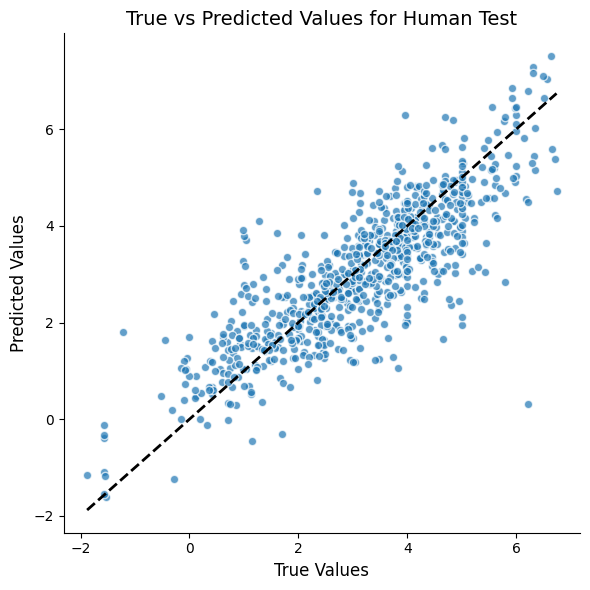

Evaluation for Human Independent dataset:
R2 Score: 0.3418
Mean Squared Error: 0.7882
Mean Absolute Error: 0.7028




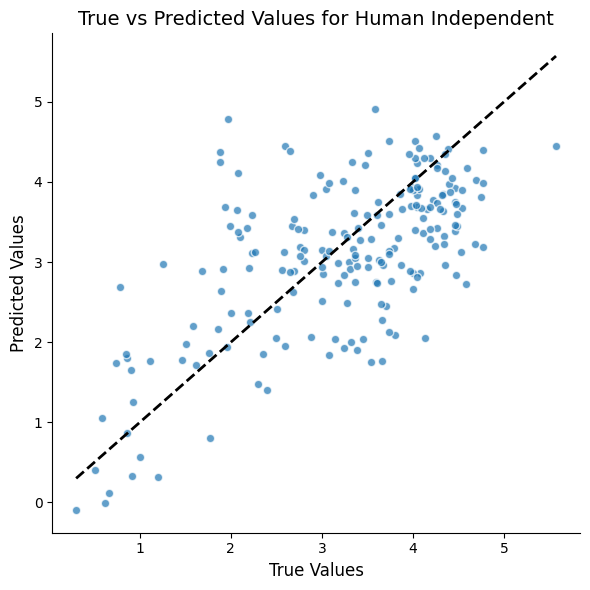

Evaluation for Eel dataset:
R2 Score: 0.1635
Mean Squared Error: 1.4411
Mean Absolute Error: 0.9300




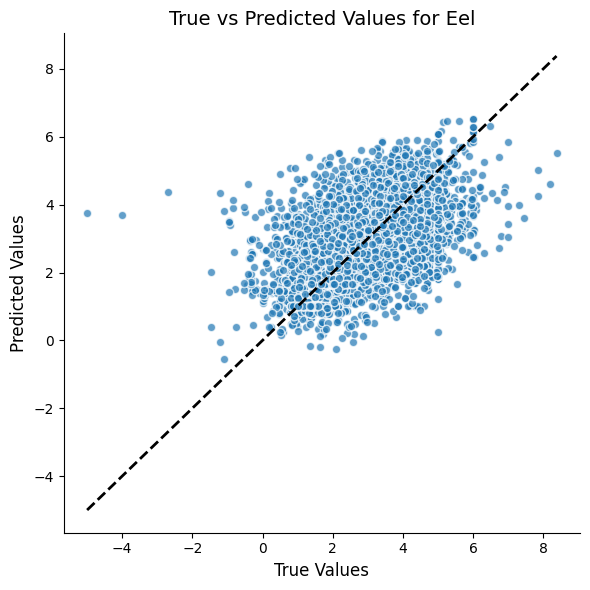

Evaluation for Mouse dataset:
R2 Score: 0.3393
Mean Squared Error: 1.3051
Mean Absolute Error: 0.8538




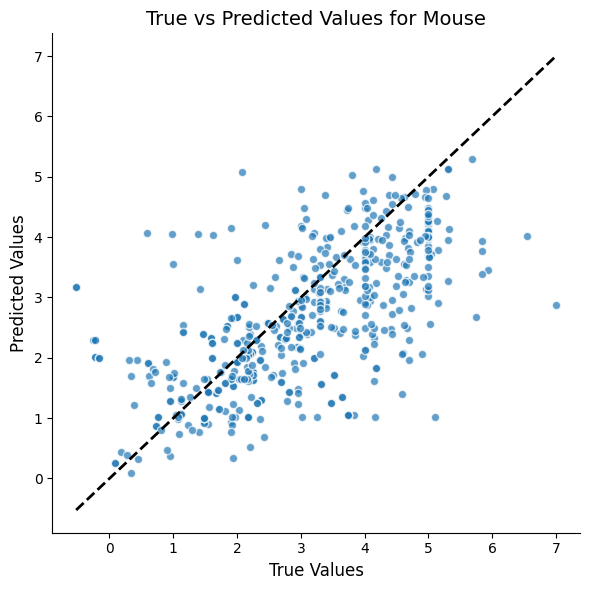

Evaluation for Cow dataset:
R2 Score: 0.5184
Mean Squared Error: 1.4200
Mean Absolute Error: 0.9198




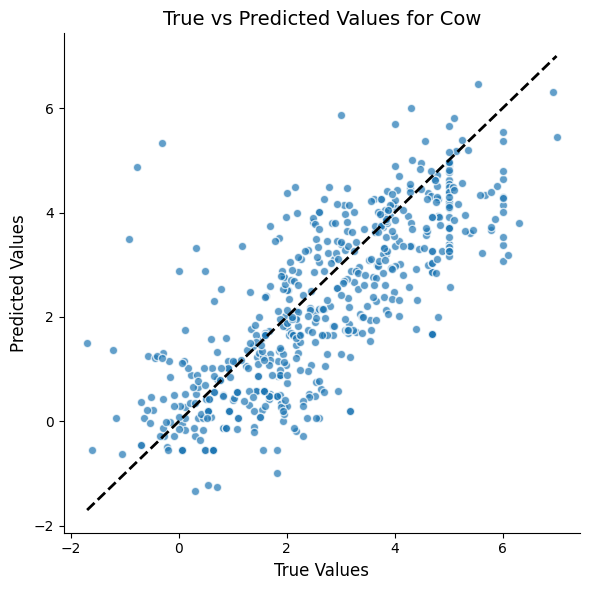

Evaluation for Ray dataset:
R2 Score: 0.5293
Mean Squared Error: 1.5500
Mean Absolute Error: 0.9440




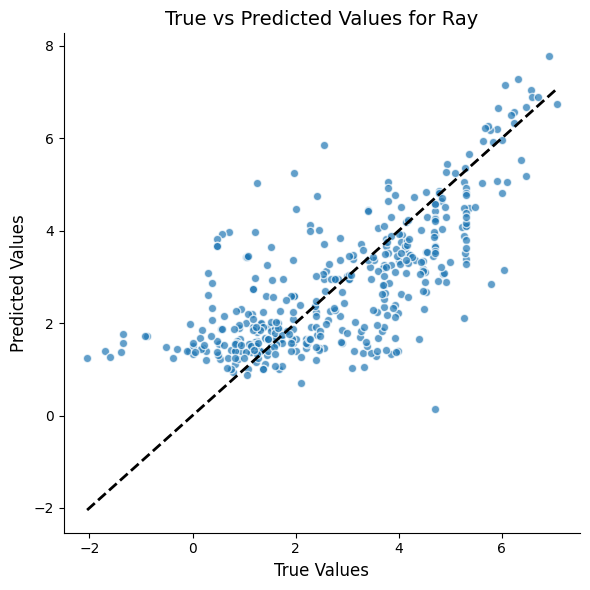

Evaluation for Mosquito dataset:
R2 Score: 0.4127
Mean Squared Error: 1.3218
Mean Absolute Error: 0.9568




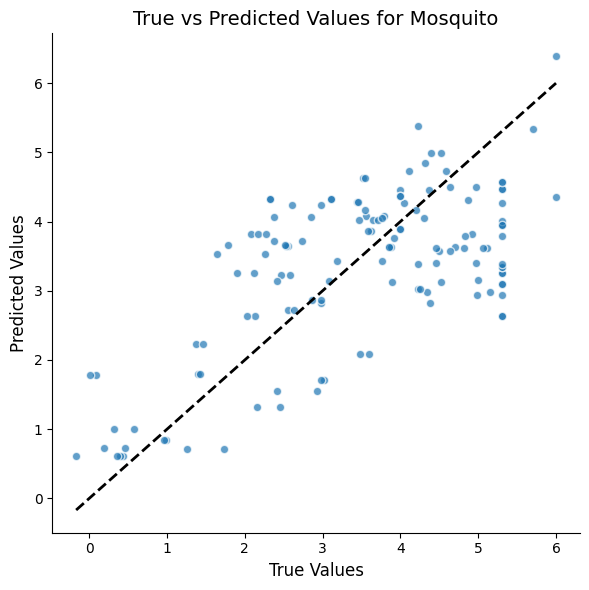

In [ ]:
import deepchem as dc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_humanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot y_pred vs y_true for each dataset
for species, data in datasets.items():
    X = data.X
    y_true = data.y.ravel()

    # Wrap X and y_true into a DeepChem dataset
    dataset = dc.data.NumpyDataset(X=X, y=y_true)

    # Make predictions on the dataset
    y_pred = modela.predict(dataset)

    # Ensure y_pred has the same length as y_true
    if len(y_pred) != len(y_true):
        raise ValueError(f"Predicted values (length {len(y_pred)}) and true values (length {len(y_true)}) must have the same length.")

    # Calculate evaluation metrics for regression
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'R2 Score': r2,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae
    }

    # Display metrics for each dataset
    print(f"Evaluation for {species} dataset:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("\n")

    # Plot y_pred vs y_true plot with publication quality settings
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='w')  # Adjust transparency and edge colors for clarity
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)  # Add a diagonal line for reference
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'True vs Predicted Values for {species}', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick parameters for readability
    plt.tick_params(axis='both', which='minor', labelsize=8)
    plt.gca().spines['top'].set_visible(False)  # Hide top and right spines
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)  # Remove grid
    plt.tight_layout()
    plt.savefig(f'{species}_true_vs_predicted.png', dpi=300)  # Save the plot as PNG with high resolution
    plt.show()

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrame to an Excel file
df_metrics.to_excel('evaluation_metrics_regression.xlsx', index_label='Species')
